## Question 1

After completing the lab assignment, write a 1-page (or less) comparison report for the libraries you used during the lab, including comparison of running times, ease of parallelization, performance review, etc. Your work will be judged based on how useful and thorough your report is.

Apply tokenization, stemming (if provided by the library), and POS tagging on the full corpus using your libraries of choice. 

In [2]:
# Data set : Florida man article 
import tika

tika.initVM()
from tika import parser
florida = parser.from_file('/Users/meganhazlett/Documents/NorthwesternMSiA/Text Analysis/floridaman.pdf')
florida_content = florida["content"]
print(florida_content)

2020-09-27 20:14:39,770 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /var/folders/95/xhfpc0yj4y93q9vwf9xrp3vm0000gn/T/tika-server.jar.
2020-09-27 20:14:45,542 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /var/folders/95/xhfpc0yj4y93q9vwf9xrp3vm0000gn/T/tika-server.jar.md5.
2020-09-27 20:14:45,999 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...










































9/23/2020 Florida man sues dating site for no refund after doctor's COVID note

https://nypost.com/2020/09/22/florida-man-sues-dating-site-for-no-refund-after-doctors-covid-note/ 1/2

Ex-cop indicted by Kentucky grand jur y in shooting death of Breonna Taylor

September 22, 2020 |  4:01pm

NEWS

Florida man sues dating site over refund after doctor ordered him to

stay home

Sign up for our special edition newsletter to get a daily update on the coronavirus pandemic.

An 86-year-old Florida man who paid a dating service nearly $5,000 couldn’t get a refund despite letters from doctors

ordering him to stay home amid the coronavirus pandemic, a lawsuit claims.

Widower Alexander Walker Sheen, of South Pasadena, sued Sun Coast Introductions LLC earlier this month for more than

$8,000 in damages after signing a contract in February with the dating site for eight meetings with potential partners over

the next year for $4,995, the Tampa Bay Times rep

In [3]:
import timeit
import matplotlib.pyplot as plt
import nltk 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
import spacy 
import stanza
import multiprocessing as mp

### NLTK

Tokenization

In [158]:
# Timing 
nltk_sents = sent_tokenize(florida_content)
nltk_words = word_tokenize(florida_content)

nltk_sents_time = timeit.timeit('lambda: word_sents(florida_conent)')
nltk_words_time = timeit.timeit('lambda: sent_tokenize(florida_conent)')

# Paralleization 
# Fairly straight forward and involves only a few lines of python code. With use of python's multiprocessing library, 
# one can use the pooling function to achieve straight forward parallization. 

# Performance review 
# Sometimes considers punctuation as words 
# Breaks apart links 

Stemming  - process of extracting the base word 

In [159]:
# Timing 
ps = PorterStemmer() 
def nltk_stem(): 
    for w in nltk_words: 
        print(w, " : ", ps.stem(w)) 
        
nltk_stem_time = timeit.timeit('lamda: nltk_stem')

# Paralleization 
# See above 

# Performance 
# Sometimes makes wrong deicsions such as turning newletter into newslet and update to updat. 
# Not up to date as coronavirus was stemmed to coronaviru
# February -> Februari
# Overall not very good 

Part of speech Tagging 

In [160]:
# Timing 
nltk_pos = nltk.pos_tag(nltk_words)
nltk_pos_time = timeit.timeit('lambda: nltk.pos_tag(nltk_words)')

# Parallization 
# See above 


# Performance 
# I like that it gives very specific parts of speech. It differentiates between common and proper nouns 
# and different types fo verbs
# A bit annoying to look up what they are though 

In [179]:
nltk_pos

[('9/23/2020', 'CD'),
 ('Florida', 'NNP'),
 ('man', 'NN'),
 ('sues', 'VBZ'),
 ('dating', 'VBG'),
 ('site', 'NN'),
 ('for', 'IN'),
 ('no', 'DT'),
 ('refund', 'NN'),
 ('after', 'IN'),
 ('doctor', 'NN'),
 ("'s", 'POS'),
 ('COVID', 'NNP'),
 ('note', 'NN'),
 ('https', 'NN'),
 (':', ':'),
 ('//nypost.com/2020/09/22/florida-man-sues-dating-site-for-no-refund-after-doctors-covid-note/',
  'JJ'),
 ('1/2', 'CD'),
 ('Ex-cop', 'JJ'),
 ('indicted', 'VBN'),
 ('by', 'IN'),
 ('Kentucky', 'NNP'),
 ('grand', 'JJ'),
 ('jur', 'NN'),
 ('y', 'NN'),
 ('in', 'IN'),
 ('shooting', 'VBG'),
 ('death', 'NN'),
 ('of', 'IN'),
 ('Breonna', 'NNP'),
 ('Taylor', 'NNP'),
 ('September', 'NNP'),
 ('22', 'CD'),
 (',', ','),
 ('2020', 'CD'),
 ('|', 'VBD'),
 ('4:01pm', 'CD'),
 ('NEWS', 'NNP'),
 ('Florida', 'NNP'),
 ('man', 'NN'),
 ('sues', 'VBZ'),
 ('dating', 'VBG'),
 ('site', 'NN'),
 ('over', 'IN'),
 ('refund', 'NN'),
 ('after', 'IN'),
 ('doctor', 'NN'),
 ('ordered', 'VBD'),
 ('him', 'PRP'),
 ('to', 'TO'),
 ('stay', 'VB'),
 

### Spacy

In [161]:
npl = spacy.load('en_core_web_sm')
npl.add_pipe(npl.create_pipe('sentencizer'))

Tokenization

In [171]:
# Timing 
florida_content_spacy = npl(florida_content)
spacy_sents = [sent.string.strip() for sent in florida_content_spacy.sents]
spacy_words = [token.text for token in florida_content_spacy]
spacy_sents_time = timeit.timeit('lambda: [sent.string.strip() for sent in florida_content_spacy.sents]')
spacy_words_time = timeit.timeit('lambda: [token.text for token in florida_content_spacy]')

# Parallelization
# Use Spacy's built in pipe method for parallization. 

# Performance 
# Sentiments are more like phrases then items of text
# I find this more useful than NLTK

Stemming - DNE in this library; relies on Lemmatization

In [163]:
# Timing 
def spacy_lemma():
    for token in florida_content_spacy: 
        print(token.text, token.lemma_)
        
spacy_lemma_time = timeit.timeit('lambda: spacy_lemma')


# Parallelization 
# See above

# Performance
# Found this to be much more accurate than NLTK: got coronavirus correct 

Part of speech tagging 

In [177]:
# Timing 
def spacy_pos():
    for token in florida_content_spacy:
        print(token.text, token.pos_, token.tag_)
        
spacy_pos_time = timeit.timeit('lambda: spacy_pos')


# Paralleization
# See above 
    

# Performance 
# I like spacy's features to spell out more clearly the part of speech than nltk 
# Also identifies when something is punctuation 

In [178]:
spacy_pos()









































 SPACE _SP
9/23/2020 PROPN NNP
Florida PROPN NNP
man NOUN NN
sues VERB VBZ
dating VERB VBG
site NOUN NN
for ADP IN
no DET DT
refund NOUN NN
after ADP IN
doctor NOUN NN
's PART POS
COVID PROPN NNP
note NOUN NN


 SPACE _SP
https://nypost.com/2020/09/22/florida-man-sues-dating-site-for-no-refund-after-doctors-covid-note/ X ADD
1/2 NUM CD


 SPACE _SP
Ex PROPN NNP
- PUNCT HYPH
cop NOUN NN
indicted VERB VBN
by ADP IN
Kentucky PROPN NNP
grand ADJ JJ
jur PROPN NNP
y PROPN NNP
in ADP IN
shooting VERB VBG
death NOUN NN
of ADP IN
Breonna PROPN NNP
Taylor PROPN NNP


 SPACE _SP
September PROPN NNP
22 NUM CD
, PUNCT ,
2020 NUM CD
| NUM CD
  SPACE _SP
4:01pm NUM CD


 SPACE _SP
NEWS NOUN NN


 SPACE _SP
Florida PROPN NNP
man NOUN NN
sues VERB VBZ
dating VERB VBG
site NOUN NN
over ADP IN
refund NOUN NN
after ADP IN
doctor NOUN NN
ordered VERB VBD
him PRON PRP
to PART TO


 SPACE _SP
stay VERB VB
home NOUN NN


 SPACE _SP
Sign VERB VB
up ADP RP
for ADP IN
our 

## Compare timing with graphs 

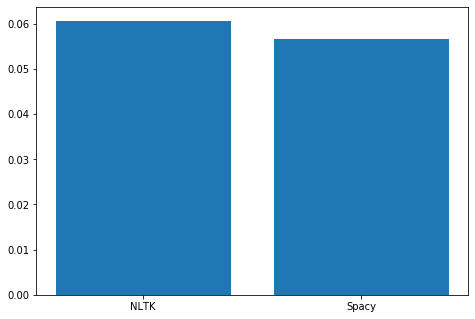

0.06066884800384287

In [167]:
# tokenization - sents 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
packages = ['NLTK', "Spacy"]
mytime = [nltk_sents_time, spacy_sents_time]
ax.bar(packages,mytime)
plt.show()

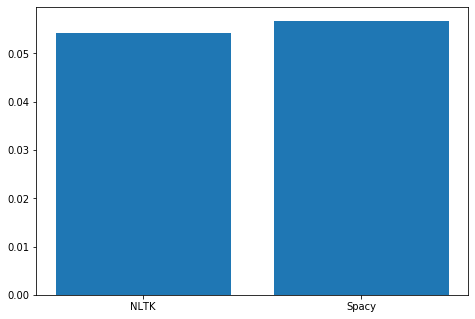

In [172]:
# tokenization - words 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
packages = ['NLTK', "Spacy"]
mytime = [nltk_words_time, spacy_words_time]
ax.bar(packages,mytime)
plt.show()

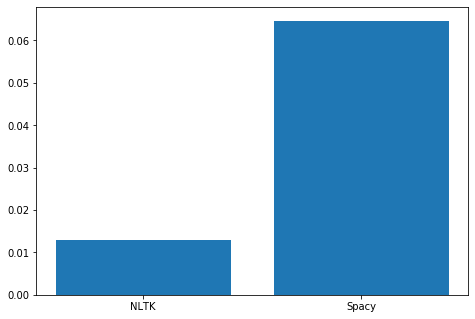

In [173]:
# stemming 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
packages = ['NLTK', "Spacy"]
mytime = [nltk_stem_time, spacy_lemma_time]
ax.bar(packages,mytime)
plt.show()

# lemma takes a lot longer 

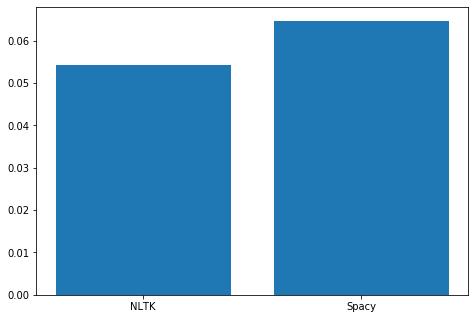

In [174]:
# pos tagging 
# tokenization - words 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
packages = ['NLTK', "Spacy"]
mytime = [nltk_pos_time, spacy_pos_time]
ax.bar(packages,mytime)
plt.show()

# Question 2

In [5]:
import re 

In [4]:
maternity = parser.from_file('/Users/meganhazlett/Documents/NorthwesternMSiA/Text Analysis/maternity.pdf')
maternity_content = maternity["content"]
print(maternity_content)























































































Breastfeeding and Breast Cancer Risk Reduction_ Implications for Black Mothers


SPECIAL
 ARTICLE
S40 Am J Prev Med 2017;53(3S1):S40–S46 & 20
open access article under
This arti
Prevention

From the 1D
Disease Con
Prevention
Atlanta, Ge

Address
tion, Physic
Prevention
Prevention,
Atlanta GA

0749-37
https://d

17 American Journal of P
the CC BY-NC-ND licen
Breastfeeding and Breast Cancer Risk Reduction:
Implications for Black Mothers
Erica H. Anstey, PhD,1 Meredith L. Shoemaker, MPH,2 Chloe M. Barrera, MPH,1

Mary Elizabeth O’Neil, MPH,2 Ashley B. Verma, MPH,1 Dawn M. Holman, MPH2
Breast cancer is the most commonly diagnosed cancer and a leading cause of death from cancer
among U.S. women. Studies have suggested that breastfeeding reduces breast cancer risk among
parous women, and there is mounting evidence that this association may differ by subtype such that
breastfeeding may be more protective of 

## 2.1 

Match all emails in text and compile a set of all found email addresses

In [55]:
maternity_sents = sent_tokenize(maternity_content)
maternity_words = word_tokenize(maternity_content)

num_sents = len(maternity_sents)
for i in range(0,num_sents):
    line = maternity_sents[i]
    match = re.search(r'[\w\.-]+@[\w\.-]+', line)  
    if match != None:
        print(match)

<re.Match object; span=(8, 21), match='yhm7@cdc.gov.'>
<re.Match object; span=(171, 183), match='yhm7@cdc.gov'>


In [56]:
florida_sents = sent_tokenize(florida_content)
florida_words = word_tokenize(florida_content)

num_sents = len(florida_sents)
for i in range(0,num_sents):
    line = florida_sents[i]
    match = re.search(r'[\w\.-]+@[\w\.-]+', line)  
    if match != None:
        print(match)

## 2.2

Find all dates in text.

In [57]:
# Dates in format mm/dd/yyyy
num_sents = len(florida_sents)
for i in range(0,num_sents):
    line = florida_sents[i]
    match = re.search(r'\d{1,2}/\d{1,2}/\d{4}', line)  
    if match != None:
        print(match)

<re.Match object; span=(40, 49), match='9/23/2020'>
<re.Match object; span=(421, 430), match='9/23/2020'>


In [156]:
# Dates in format Month dd, yyyy
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
num_sents = len(florida_sents)
for i in range(0,num_sents):
    line = florida_sents[i]
    month_key = any(months in line for months in months)
    if month_key != False: 
        match = re.search(r'\b[A-Z].*?\b[" "]{1}\d{1,2}[\,\.]{1}[" "]{1}\d{4}', line)  
        if match != None: 
            print(match)

<re.Match object; span=(301, 319), match='September 22, 2020'>
